In [1]:
import pandas as pd 

penguins = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-28/penguins.csv")

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# frequency distribution of the species

basic approach- form a dictionary using Counter and then print it\
without pandas

In [4]:
pd.unique(penguins.species)

from collections import Counter

p = Counter(penguins.species)

In [6]:
for key,value in p.items():
    print(f"{key}: {value}")

Adelie: 152
Gentoo: 124
Chinstrap: 68


using .describe(include = 'all')\
this only gives the frequency of the top species and the no. of unique values

In [13]:
#penguins.info()
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


It's probably the best approach\
minimal, makes use of pandas

In [14]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

# Visualizations

In [18]:
penguin_long = pd.melt(penguins,id_vars = ['species','island','sex','year'], 
        var_name = 'metrics', value_name = 'value')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

using matplotlib, without FacetWraps

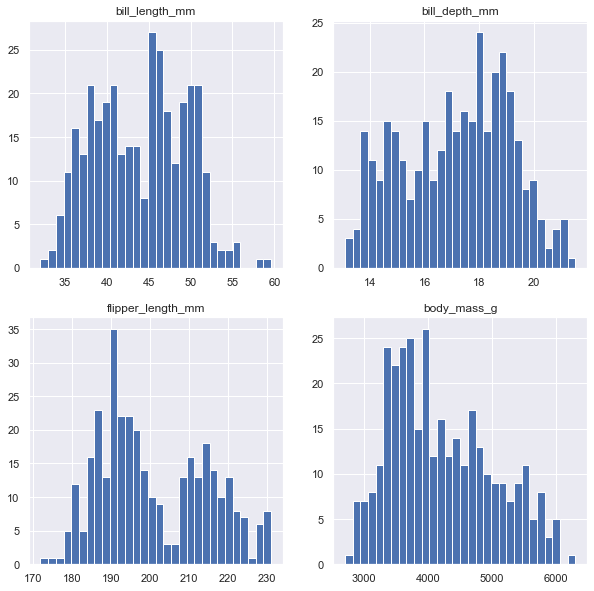

In [52]:
fig, axes = plt.subplots(2,2,  figsize = (10,10))

for i,ax in enumerate(axes.flat):
    ax.hist(penguins.iloc[:,i+2], bins = 30)
    ax.set_title(label = penguins.columns[i+2])

In [73]:
## This approach didn't work but it should be remembered
#--------------------

# int_dict = {'Adelie': 'red', 'Gentoo': 'blue', 'Chinstrap': 'green'}

# sp_col = penguins.species.replace(int_dict)

# fig, axes = plt.subplots(2,2,  figsize = (10,10))

# for i,ax in enumerate(axes.flat):
#     ax.hist(penguins.iloc[:,i+2], bins = 30, color = sp_col)
#     ax.set_title(label = penguins.columns[i+2])




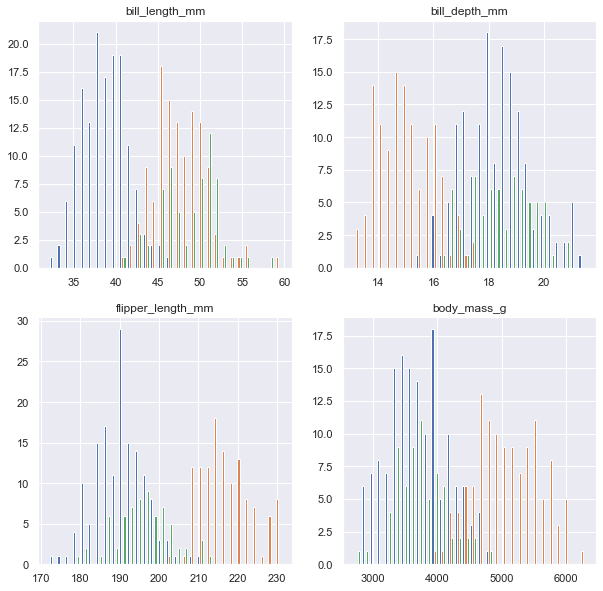

In [89]:
fig, axes = plt.subplots(2,2,  figsize = (10,10))

for i,ax in enumerate(axes.flat):
    ax.hist([penguins.loc[penguins.species == x, penguins.columns[i+2]] for x in penguins.species.unique()], bins = 30)
    ax.set_title(label = penguins.columns[i+2])

How to get histograms?? These are barplots

In [92]:
penguin_long.metrics.astype('category', inplace = True)
penguin_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 6 columns):
species    1376 non-null object
island     1376 non-null object
sex        1332 non-null object
year       1376 non-null int64
metrics    1376 non-null object
value      1368 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 64.6+ KB


__using sns FacetGrid__

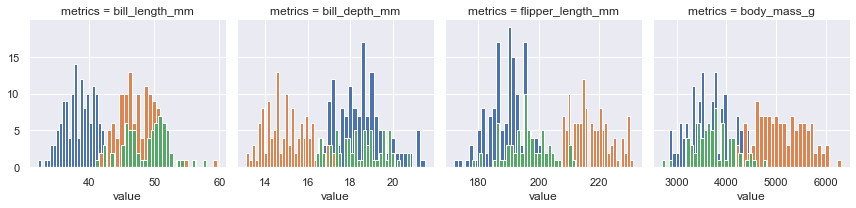

In [119]:

g = sns.FacetGrid(penguin_long, sharex = False, hue = 'species', col = 'metrics')
g.map(plt.hist, 'value', bins = 30)


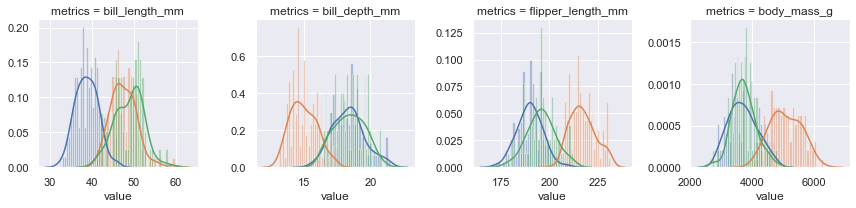

In [124]:

g = sns.FacetGrid(penguin_long, sharex = False, sharey = False, hue = 'species', col = 'metrics')
g.map(sns.distplot, 'value', bins = 30)


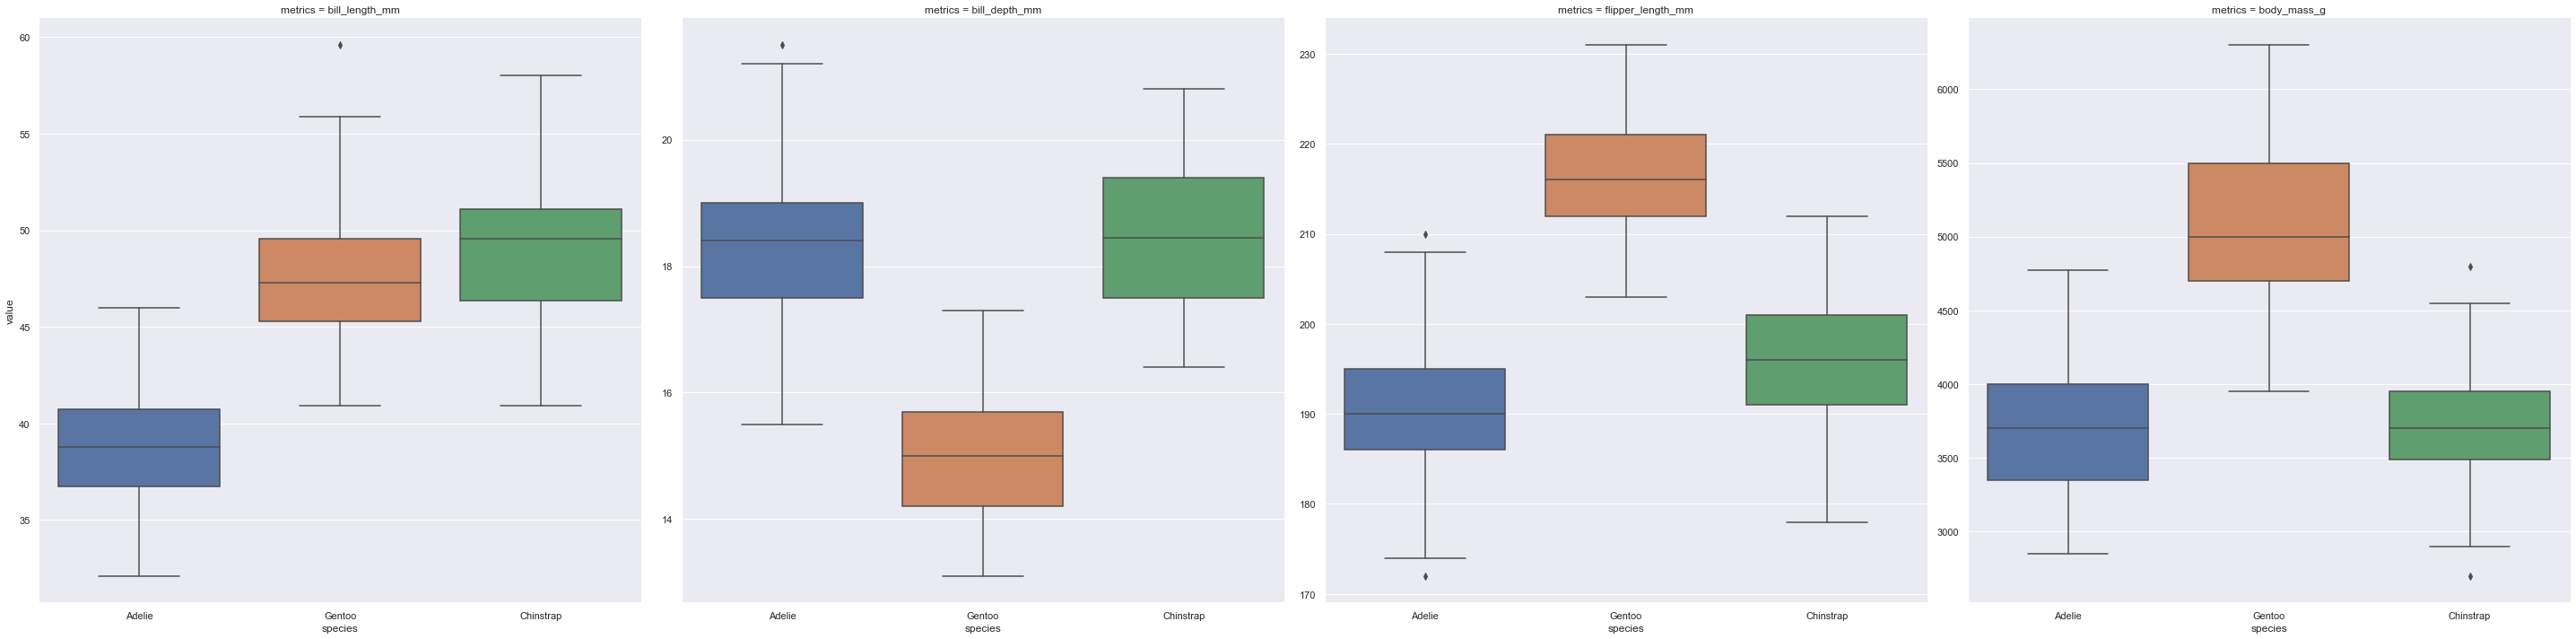

In [133]:
sns.catplot(x = 'species',y = 'value',col = 'metrics',data = penguin_long, kind = 'box', sharey = False, height = 10)

## Logistic Regression

### Predicting species

In [2]:
# Missing Values 
penguins.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [3]:
penguins.dropna(inplace = True)

In [ ]:
# from sklearn.preprocessing  import Imputer
# X = penguins.iloc[:,1:]
# imp_numeric = Imputer(np.nan, strategy = 'mean', axis = 1)
# imp_cat = Imputer(np.nan, strategy = 'most_frequent', axis = 1)

# X[:,2:6] = imp_numeric.fit_transform(x[:,2:6])
# X[:,6] = imp_numeric.fit_transform(x[:,6])


In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [5]:
df_proc = pd.get_dummies(penguins, columns = ['island','sex'])

In [6]:
df_proc.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,39.1,18.7,181.0,3750.0,2007,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,2007,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,2007,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,2007,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,2007,0,0,1,0,1


In [7]:
X = df_proc.iloc[:,1:].values
y = df_proc.species.values

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X,y)

C:\Users\iutti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iutti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
lr.predict(X)
lr.score(X,y)

0.996996996996997

It seems predicting __species__ is not a very good idea, since it has 99% training accuracy.As Julia Silge pointed out that these are the features that distinguishes between different species so it's expected that the classifier will perform great. Instead predicting __gender__ might be better

In [19]:
import numpy as np
np.round(lr.coef_)

array([[-1.,  2., -0.,  0.,  0., -0., -1.,  1., -1.,  1.],
       [ 2.,  0., -0., -0., -0., -0.,  0., -0.,  0., -0.],
       [-0., -1.,  0.,  0., -0.,  0., -0., -0.,  0., -0.]])

### predicting gender

In [26]:
df_proc = pd.get_dummies(penguins, columns = ['island','species'])

df_proc.head()



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,male,2007,0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,female,2007,0,0,1,1,0,0
2,40.3,18.0,195.0,3250.0,female,2007,0,0,1,1,0,0
4,36.7,19.3,193.0,3450.0,female,2007,0,0,1,1,0,0
5,39.3,20.6,190.0,3650.0,male,2007,0,0,1,1,0,0


In [27]:
X = df_proc.iloc[:,[0,1,2,3,5,6,7,8,9,10,11]].values
y = df_proc.sex.values

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [32]:
lr_g = LogisticRegression()

lr_g.fit(X_train, y_train)
np.round(lr_g.coeff_)



C:\Users\iutti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AttributeError: 'LogisticRegression' object has no attribute 'coeff_'

In [ ]:
lr_g.score(X_test, y_test)